#   Predicting Contracts that go over specified amount


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re

## 1. Load data

In [2]:
# Import several csv files into a dataframe
#  Files being imported: 
#      Oct01_2012_to_Sep30_2013.csv
#      Oct01_2013_to_Sep30_2014.csv
#      Oct01_2014_to_Sep30_2015.csv
#      Oct01_2015_to_Sep30_2016.csv

import glob
glob.glob("Oct01_*.csv")

spend_df = pd.DataFrame()
for f in glob.glob("Oct01_*.csv"):
    df = pd.read_csv(f, low_memory=False)
    spend_df = spend_df.append(df,ignore_index=True)

In [3]:
spend_df.shape

(654495, 225)

In [4]:
# Numerical columns were being imported as floats because we had some null values. 
# 'congressional district is considered here as numerical just so we convert it to integer but later is considered as categorical
# Convert them to integer and 0 for nulls:

numericalColumns = ['annualrevenue','baseandalloptionsvalue','baseandexercisedoptionsvalue','dollarsobligated',
                    'fiscal_year','numberofactions','numberofoffersreceived','numberofemployees',
                    'prime_awardee_executive1_compensation','prime_awardee_executive2_compensation',
                    'prime_awardee_executive3_compensation','prime_awardee_executive4_compensation',
                    'prime_awardee_executive5_compensation', 'congressionaldistrict', 'vendor_cd']
 
for col in numericalColumns:
   spend_df[col] = spend_df[col].apply(lambda x: int(x) if x == x else 0)


In [5]:
spend_df[numericalColumns].head(2)

,annualrevenue,baseandalloptionsvalue,baseandexercisedoptionsvalue,dollarsobligated,fiscal_year,numberofactions,numberofoffersreceived,numberofemployees,prime_awardee_executive1_compensation,prime_awardee_executive2_compensation,prime_awardee_executive3_compensation,prime_awardee_executive4_compensation,prime_awardee_executive5_compensation,congressionaldistrict,vendor_cd
0,500000,10217,10217,10217,2013,1,3,4,0,0,0,0,0,21,21
1,1000000,0,0,0,2013,1,3,15,0,0,0,0,0,10,10


## 2. Exploratory Data Analysis  (mainly in Tableau)

In [6]:
spend_df[(spend_df.baseandexercisedoptionsvalue == 0)]

,unique_transaction_id,transaction_status,dollarsobligated,baseandexercisedoptionsvalue,baseandalloptionsvalue,maj_agency_cat,mod_agency,maj_fund_agency_cat,contractingofficeagencyid,contractingofficeid,...,prime_awardee_executive2,prime_awardee_executive2_compensation,prime_awardee_executive3,prime_awardee_executive3_compensation,prime_awardee_executive4,prime_awardee_executive4_compensation,prime_awardee_executive5,prime_awardee_executive5_compensation,interagencycontractingauthority,last_modified_date
1,f2b754b4-6144-6a7f-2d27-278203ca95a2,Active,0,0,0,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,W15P7T: W6QK ACC-APG,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,9/20/2013
13,a1e64238-126c-0cc4-0576-3ef5549eabe6,Active,248500,0,0,9700: DEPT OF DEFENSE,97ZS: U.S. SPECIAL OPERATIONS COMMAND (USSOCOM),9700: DEPT OF DEFENSE,97ZS: U.S. SPECIAL OPERATIONS COMMAND (USSOCOM),H92222: USSOCOM REGIONAL CONTRACTING OFFICE,...,Barbara Craig,410821,David Feuerstein,426213,April Camille Tuker,394041,Stuart McKenna,234548,X: Not Applicable,7/15/2013
18,bc600338-2e95-4e0b-5bd0-2cc928480b16,Active,0,0,0,"6900: TRANSPORTATION, DEPARTMENT OF",6938: MARITIME ADMINISTRATION,9700: DEPT OF DEFENSE,6938: MARITIME ADMINISTRATION,00094: DEPT OF TRANS/MARITIME ADMINISTRATION,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,3/6/2014
19,06e565e0-9d8c-9f24-3468-c9f1abfd8c66,Active,0,0,0,"6900: TRANSPORTATION, DEPARTMENT OF",6938: MARITIME ADMINISTRATION,9700: DEPT OF DEFENSE,6938: MARITIME ADMINISTRATION,00094: DEPT OF TRANS/MARITIME ADMINISTRATION,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,3/6/2014
25,7283f359-c27f-8ab2-091a-b8a76fd4d838,Active,0,0,0,"1200: AGRICULTURE, DEPARTMENT OF",12C2: FOREST SERVICE,"1200: AGRICULTURE, DEPARTMENT OF",12C2: FOREST SERVICE,3187: WASHINGTON OFFICE,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,9/19/2013
29,3b9b50b9-393f-9926-4fbc-af457398a9cc,Active,0,0,0,"1200: AGRICULTURE, DEPARTMENT OF",12C2: FOREST SERVICE,"1200: AGRICULTURE, DEPARTMENT OF",12C2: FOREST SERVICE,3187: WASHINGTON OFFICE,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,9/16/2013
35,c21df936-63bf-be4a-af05-8dc70b67aa01,Active,0,0,0,9700: DEPT OF DEFENSE,97AS: DEFENSE LOGISTICS AGENCY,9700: DEPT OF DEFENSE,97AS: DEFENSE LOGISTICS AGENCY,SPMYM4: DLA MARITIME - PEARL HARBOR,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,7/11/2013
48,9d3ab976-a3a5-9e41-2709-6844248494f4,Active,0,0,0,9700: DEPT OF DEFENSE,1700: DEPT OF THE NAVY,9700: DEPT OF DEFENSE,1700: DEPT OF THE NAVY,N69450: NAVFAC SOUTHEAST,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,2/19/2014
53,488ab81f-e72e-d9ea-c2ff-bd211f2626f0,Active,0,0,0,9700: DEPT OF DEFENSE,97AS: DEFENSE LOGISTICS AGENCY,9700: DEPT OF DEFENSE,97AS: DEFENSE LOGISTICS AGENCY,SPM7L1: DLA LAND AND MARITIME,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,3/9/2014
57,3b33cf15-fedf-bf6a-f964-e3032c9e045b,Active,0,0,0,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,W912NW: W0MU USA DEP CORPUS CHRISTI,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,7/10/2013


In [7]:
spend_df[(spend_df.baseandalloptionsvalue < 0) & (spend_df.baseandexercisedoptionsvalue == 0)]

,unique_transaction_id,transaction_status,dollarsobligated,baseandexercisedoptionsvalue,baseandalloptionsvalue,maj_agency_cat,mod_agency,maj_fund_agency_cat,contractingofficeagencyid,contractingofficeid,...,prime_awardee_executive2,prime_awardee_executive2_compensation,prime_awardee_executive3,prime_awardee_executive3_compensation,prime_awardee_executive4,prime_awardee_executive4_compensation,prime_awardee_executive5,prime_awardee_executive5_compensation,interagencycontractingauthority,last_modified_date
2356,90e42ab3-f037-d84e-1155-4a7215cf05d8,Active,342112,0,-6911504,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,W56HZV: W4GG HQ US ARMY TACOM,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,10/26/2012
6451,9c058767-630b-717b-9da0-5cca70797798,Active,0,0,-400387,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,W81K00: W40M USA MEDCOM HCAA,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,6/5/2013
6551,5eb4ea0d-69b7-7aab-1486-99c523ea87e8,Active,0,0,-924111,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,FA8051: FA8051 772 ESS PKD,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,8/27/2013
6909,fa7f516e-96e1-03ea-921f-810a8e618eeb,Active,0,0,-9600,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,FA4417: FA4417 1 SOCONS LGC,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,8/21/2013
7119,c2692708-8930-f2ef-0319-dd921bb03d23,Active,0,0,-43050,"7000: HOMELAND SECURITY, DEPARTMENT OF",7014: U.S. CUSTOMS AND BORDER PROTECTION,"7000: HOMELAND SECURITY, DEPARTMENT OF",7014: U.S. CUSTOMS AND BORDER PROTECTION,ITCD: INFORMATION TECHNOLOGY CONTRACTING DIVISION,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,3/2/2015
9242,ec29fc8c-ee3d-db65-7dd0-299b74aa975c,Active,0,0,-259748,9700: DEPT OF DEFENSE,97F1: DEFENSE MEDIA ACTIVITY (DMA),9700: DEPT OF DEFENSE,97F1: DEFENSE MEDIA ACTIVITY (DMA),HQ0028: DMA RIVERSIDE,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,3/7/2013
9303,0b9716d1-3840-da93-4102-53e2d7d9ab4b,Active,0,0,-199222,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,FA3030: FA3030 17 CONS CC,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,6/20/2014
9511,49d3f2a5-3117-0513-5535-f9a50156fc60,Active,0,0,-201401,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,FA7000: FA7000 10 CONS LGC,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,7/7/2014
11640,2583541e-5fda-e2a0-7c93-4426fb84d830,Active,0,0,-29524,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,9700: DEPT OF DEFENSE,2100: DEPT OF THE ARMY,W91YTZ: W40M NORTHEREGION CONTRACT OFC,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,9/11/2013
11702,cab75da6-1c34-2c2a-47d1-1b1bbbb61773,Active,0,0,-7867,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,9700: DEPT OF DEFENSE,5700: DEPT OF THE AIR FORCE,FA4801: FA4801 49 CONS LGCP,...,NaN,0,NaN,0,NaN,0,NaN,0,X: Not Applicable,9/26/2013


##  3. Data cleaning 

###   Removed not necessary columns:  
   1. Executive Awards
   2. Remove columns that contain same values in all rows
   3. Transaction Id's
   4. Description columns when we have already code for them
   5. Columns with more than 95% missing values
   
####  Removed rows with 0's in the 3 quantity columns

In [8]:
# Drop columns that are not necessary

spend_df = spend_df.drop(['agencyid','dunsnumber','idvagencyid','idvmodificationnumber', 'idvpiid',
                          'descriptionofcontractrequirement','divisionname','descriptionofcontractrequirement',
                          'vendorname','vendoralternatename','streetaddress','streetaddress2','streetaddress3','city',
                          'state','phoneno','faxno','fundingrequestingofficeid','mod_parent','vendorsitecode',
                          'vendordoingasbusinessname','divisionname','modnumber','piid','placeofperformancecity', 
                          'placeofperformancecountrycode', 'placeofperformancezipcode','vendoralternatesitecode',
                          'vendorlegalorganizationname','parentdunsnumber','prime_awardee_executive1',
                          'prime_awardee_executive2','prime_awardee_executive3','prime_awardee_executive4',
                          'prime_awardee_executive5','progsourceaccount','principalnaicscode',
                          'priceevaluationpercentdifference','solicitationid','smallbusinesscompetitivenessdemonstrationprogram',
                          'transactionnumber','transaction_status','zipcode','unique_transaction_id','vendorcountrycode',
                          'vendor_state_code','registrationdate','pop_cd'], axis=1)

# Drop rows that have ALL the three values = 0 : baseandalloptionsvalue , baseandexercisedoptionsvalue &  are 0
spend_df = spend_df.drop(spend_df[(spend_df.dollarsobligated == 0) & (spend_df.baseandalloptionsvalue == 0) & 
                                  (spend_df.baseandexercisedoptionsvalue ==0)].index)

spend_df.shape

(556016, 179)

#### Fixed incorrect codes

In [10]:
spend_df['maj_agency_cat_code'] = spend_df['maj_agency_cat'].str.split(':').str[0]

# There are some incorrectly including some characters, I removed the characters and just left the numbers
spend_df['maj_agency_cat_code'] = spend_df['maj_agency_cat'].apply(lambda r: ''.join(x for x in r if x.isdigit()))


#### Remove columns that have at least 95% missing values

In [11]:
spend_df = spend_df.dropna(thresh=(0.05*len(spend_df)), axis=1)
spend_df.shape


(556016, 164)

##  4. Data transformations 
     1. Removed descriptions from columns that contain a code
     2. Standarize Binary columns (Y/N): ie: False, True, 0, 1, Yes, No, yes, no,true Assigned X to nulls
     3. Handle categorical values

In [12]:
# The following categorical columns need to be transformed, just get the code ( the characters before the colon)

leftCodeColumns = ['contractingofficeagencyid','contractingofficeid','contractbundling','consolidatedcontract',
                   'fundingrequestingagencyid','gfe_gfp','interagencycontractingauthority','typeofcontractpricing',
                   'subcontractplan','multiyearcontract','performancebasedservicecontract','claimantprogramcode',
                   'commercialitemacquisitionprocedures','commercialitemtestprogram',
                   'contingencyhumanitarianpeacekeepingoperation','contractfinancing',
                   'contractingofficerbusinesssizedetermination','costorpricingdata','extentcompeted',
                   'fedbizopps','informationtechnologycommercialitemcategory','maj_agency_cat_code',
                   'manufacturingorganizationtype','nationalinterestactioncode','placeofmanufacture','productorservicecode',
                   'psc_cat','purchasecardaspaymentmethod','reasonformodification','reasonnotcompeted','recoveredmaterialclauses',
                   'seatransportation','solicitationprocedures','systemequipmentcode', 'useofepadesignatedproducts']

for col in leftCodeColumns:
   spend_df[col] = spend_df[col].apply(lambda x: x.split(':')[0] if x == x else 'NONE')
          

In [13]:
#  These columns have True, False, Yes, No, Y, N values  convert all to Y, N or X(for nulls)
flagColumns = ['firm8aflag','aiobflag','apaobflag','baobflag']

spend_df.loc[spend_df.firm8aflag.isnull(), 'firm8aflag'] = 'X'
spend_df['firm8aflag'] = spend_df['firm8aflag'].str[0:1]
spend_df.loc[(spend_df.firm8aflag == 'F'), 'firm8aflag'] = 'N'
spend_df.loc[(spend_df.firm8aflag == 'T'), 'firm8aflag'] = 'Y'


spend_df.loc[spend_df.firm8aflag.isnull(), 'firm8aflag'] = 'X'
spend_df['firm8aflag'] = spend_df['firm8aflag'].str[0:1]
spend_df.loc[(spend_df.firm8aflag == 'F'), 'firm8aflag'] = 'N'
spend_df.loc[(spend_df.firm8aflag == 'T'), 'firm8aflag'] = 'Y'

spend_df.loc[spend_df.aiobflag.isnull(), 'aiobflag'] = 'X'
spend_df['aiobflag'] = spend_df['aiobflag'].str[0:1]
spend_df.loc[(spend_df.aiobflag == 'F'), 'aiobflag'] = 'N'
spend_df.loc[(spend_df.aiobflag == 'T'), 'aiobflag'] = 'Y'

spend_df.loc[spend_df.apaobflag.isnull(), 'apaobflag'] = 'X'
spend_df['apaobflag'] = spend_df['apaobflag'].str[0:1]
spend_df.loc[(spend_df.apaobflag == 'F'), 'apaobflag'] = 'N'
spend_df.loc[(spend_df.apaobflag == 'T'), 'apaobflag'] = 'Y'

spend_df.loc[spend_df.baobflag.isnull(), 'baobflag'] = 'X'
spend_df['baobflag'] = spend_df['baobflag'].str[0:1]
spend_df.loc[(spend_df.baobflag == 'F'), 'baobflag'] = 'N'
spend_df.loc[(spend_df.baobflag == 'T'), 'baobflag'] = 'Y'


In [14]:
#  Convert columns by first characters that can be used to categorize them

# The following columns can be converted by just using the first characters:  

spend_df['a76action'] = spend_df['a76action'].str[0]
spend_df['countryoforigin'] = spend_df['countryoforigin'].str[0:3]


#### Convert Categorical values

In [15]:
categorical_columns = ['maj_agency_cat_code','a76action','aiobflag','apaobflag','baobflag','claimantprogramcode',
                       'clingercohenact','commercialitemacquisitionprocedures',
                       'commercialitemtestprogram','congressionaldistrict','consolidatedcontract',
                       'contingencyhumanitarianpeacekeepingoperation','contractactiontype','contractbundling','contractfinancing',
                       'contractingofficeid','contractingofficeagencyid','contractingofficerbusinesssizedetermination',
                       'costaccountingstandardsclause','costorpricingdata','countryoforigin','davisbaconact',
                       'educationalinstitutionflag','emergingsmallbusinessflag','evaluatedpreference',
                       'extentcompeted','fedbizopps','federalgovernmentflag','firm8aflag',
                       'fundedbyforeignentity','fundingrequestingagencyid','gfe_gfp',
                       'haobflag','hbcuflag','hospitalflag','hubzoneflag','informationtechnologycommercialitemcategory',
                       'interagencycontractingauthority','is1862landgrantcollege','is1890landgrantcollege',
                       'is1994landgrantcollege','isairportauthority','isalaskannativeownedcorporationorfirm',
                       'isarchitectureandengineering','iscitylocalgovernment','iscommunitydevelopedcorporationownedfirm',
                       'iscommunitydevelopmentcorporation','isconstructionfirm',
                       'iscorporateentitynottaxexempt','iscorporateentitytaxexempt','iscouncilofgovernments',
                       'iscountylocalgovernment','isdomesticshelter','isdotcertifieddisadvantagedbusinessenterprise',
                       'isecondisadvwomenownedsmallbusiness','isfederalgovernmentagency',
                       'isfederallyfundedresearchanddevelopmentcorp','isforeigngovernment','isforeignownedandlocated',
                       'isforprofitorganization','isfoundation','ishispanicservicinginstitution',
                       'ishousingauthoritiespublicortribal','isindiantribe','isintermunicipallocalgovernment',
                       'isinternationalorganization','isinterstateentity','isjointventureecondisadvwomenownedsmallbusiness',
                       'isjointventurewomenownedsmallbusiness','islaborsurplusareafirm','islimitedliabilitycorporation',
                       'islocalgovernmentowned','ismanufacturerofgoods','ismunicipalitylocalgovernment',
                       'isnativehawaiianownedorganizationorfirm','isotherbusinessororganization','isotherminorityowned',
                       'isothernotforprofitorganization','ispartnershiporlimitedliabilitypartnership','isplanningcommission',
                       'isportauthority','isprivateuniversityorcollege','issbacertifiedsmalldisadvantagedbusiness',
                       'isschooldistrictlocalgovernment','isschoolofforestry','issmallagriculturalcooperative',
                       'issoleproprietorship','isstatecontrolledinstitutionofhigherlearning','issubchapterscorporation',
                       'issubchapterscorporation','issubchapterscorporation','istownshiplocalgovernment','istransitauthority',
                       'istribalcollege','istriballyownedfirm','isveterinarycollege','isveterinaryhospital',
                       'iswomenownedsmallbusiness','lettercontract','localareasetaside','localgovernmentflag',
                       'maj_fund_agency_cat',
                       'manufacturingorganizationtype','minorityinstitutionflag','minorityinstitutionflag',
                       'minorityownedbusinessflag','mod_agency','multiyearcontract','naobflag','nationalinterestactioncode',
                       'nonprofitorganizationflag','organizationaltype','performancebasedservicecontract','placeofmanufacture',
                       'placeofperformancecongressionaldistrict','pop_state_code','productorservicecode','progsourceagency',
                       'progsourcesubacct','psc_cat','purchasecardaspaymentmethod','reasonformodification','reasonnotcompeted',
                       'receivescontracts','receivescontractsandgrants','receivesgrants','recoveredmaterialclauses','saaobflag','sdbflag',
                       'seatransportation','servicecontractact','shelteredworkshopflag','solicitationprocedures','srdvobflag',
                       'statecode','stategovernmentflag','statutoryexceptiontofairopportunity','subcontractplan',
                       'systemequipmentcode','tribalgovernmentflag','typeofcontractpricing','typeofsetaside','useofepadesignatedproducts',
                       'vendor_cd','veteranownedflag','walshhealyact','womenownedflag']

#spend_df[categoricalColumns] = spend_df[categoricalColumns].fillna('NONE')

In [16]:
#  Convert to Categorical Numeric Column

for col in categorical_columns:
   list_cat = spend_df[col].value_counts().index.tolist()
   spend_df[col] =  spend_df[col].apply(lambda x: list_cat.index(x) if x == x else '-1')

In [17]:
spend_df.shape

(556016, 164)

In [18]:
# Changed baseandalloptionsvalue to thousands,  divided by 1000 to easier visualization

spend_df['baseandalloptionsvalue'] = spend_df['baseandalloptionsvalue']/1000

### 4.1 Feature Engineering and Data Imputation
     Dates 
         Signed vs Effective 
         Effective vs modification


In [19]:

#  They use 1/1/1900 date as default so I impute this date to substitute null values

dateColumns = ['currentcompletiondate','ultimatecompletiondate','effectivedate','signeddate','last_modified_date','renewaldate']
               
spend_df[dateColumns].fillna('1/1/1900')
spend_df.shape

(556016, 164)

In [21]:
spend_df.maj_agency_cat.value_counts().head(5)

9700: Department of Defense              302867
9700: DEPT OF DEFENSE                    103853
3600: VETERANS AFFAIRS, DEPARTMENT OF     19328
3600: Department of Veterans Affairs      16968
1500: JUSTICE, DEPARTMENT OF              16502
Name: maj_agency_cat, dtype: int64

### Create Categorical lists and export them to use in Data Product

In [22]:
#  Create these lists to use them for DataProduct Input conversion after modeling:

list_reasonformodification = spend_df['reasonformodification'].value_counts().index.tolist()
list_contractingofficeid = spend_df['contractingofficeid'].value_counts().index.tolist()
list_productorservicecode = spend_df['productorservicecode'].value_counts().index.tolist()
list_psc_cat = spend_df['psc_cat'].value_counts().index.tolist()
list_pl_perf_district = spend_df['placeofperformancecongressionaldistrict'].value_counts().index.tolist()
list_congressionaldistrict = spend_df['congressionaldistrict'].value_counts().index.tolist()
list_vendor_cd = spend_df['vendor_cd'].value_counts().index.tolist()


In [23]:
 
spend_df['currentcompletiondate'] = pd.to_datetime(spend_df['currentcompletiondate'], errors='coerce')
spend_df['signeddate'] = pd.to_datetime(spend_df['signeddate'], errors='coerce')
spend_df['ultimatecompletiondate'] = pd.to_datetime(spend_df['ultimatecompletiondate'], errors='coerce')


#### Date Calculations 
    Signed vs Effective date
    Other calculated features were not selected at the end as hyperparameters

In [24]:
#  DATES 

# Set null values to 1/1/1900 as default

# From Data Dictionary : 
 #   ultimatecompletiondate is the Estimated or Scheduled completion date
 #   effective date : effectivedate is The date that the parties agree will be the starting date for the contract's
 #                     requirements. Usually, this is the same as the date signed, but may be different
 #  currentcompletiondate:  The current expected or scheduled contract completion date,including modifications made later

# Calculate the original estimated duration days for the contract
spend_df['original_estimated_days'] = ((spend_df.ultimatecompletiondate - spend_df.signeddate) / np.timedelta64(1, 'D'))

# Caculate how many days passed from Signed Date to current estimated date (currentcompletiondate)
spend_df['current_estimated_days'] = ((spend_df.currentcompletiondate - spend_df.signeddate) / np.timedelta64(1, 'D'))

# Calculate how many days passed from Estimated date (ultimatecompletiondate) to the most current estimated date(currentcompletion)
spend_df['delayed_days'] = ((spend_df.ultimatecompletiondate - spend_df.currentcompletiondate) / np.timedelta64(1, 'D'))

spend_df.loc[(spend_df.delayed_days < -41000), 'delayed_days'] = 0
spend_df.loc[(spend_df.current_estimated_days < -41000), 'current_estimated_days'] = 0
spend_df.loc[(spend_df.original_estimated_days < -41000), 'original_estimated_days'] = 0

spend_df.loc[spend_df.original_estimated_days.isnull(), 'original_estimated_days'] = 0
spend_df.loc[spend_df.current_estimated_days.isnull(), 'current_estimated_days'] = 0
spend_df.loc[spend_df.delayed_days.isnull(), 'delayed_days'] = 0

#  Now drop the date columns we no longer need:

spend_df = spend_df.drop(dateColumns, axis=1)




Decision Tree Classifier to select important features

Random Forest classifier to select important features

I joined the important features from both models & used them in Random Fores

For comparison I also included the KNN after the already tunned parameter Random Forest Modeling.

Also KNN & Logistic Regression incuded below for score comparison

In [25]:
#  Save the file to use it with other visualization tools like Tableau 
spend_df.to_csv('spend_df', line_terminator=',', index=False, header=False)

## Decision Tree  - Grid Search 

In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

#### Create prediction column ( 1 if it is an Overspending observation ( baseandalloptionsvalue < 0 ))

In [27]:
#   Create the prediction Column 1 if it is an Overspending observation ( baseandalloptionsvalue < 0 )

spend_df['overSpending'] = spend_df['baseandalloptionsvalue'].map(lambda x: 1 if x < 0 else 0)


In [29]:
removeColumns = (['maj_agency_cat','dollarsobligated', 'baseandexercisedoptionsvalue', 'baseandalloptionsvalue','overSpending'])

In [30]:
X = spend_df.drop(removeColumns, axis=1)
y = spend_df.overSpending

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78978)

feature_cols = X.columns


In [31]:
treeclf = DecisionTreeClassifier(random_state=1)
max_depth_range = range(1, 21)
param_grid = dict(max_depth=list(max_depth_range))
grid = GridSearchCV(treeclf, param_grid, cv=10, scoring='roc_auc')    
grid.fit(X, y)  

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [32]:
print (grid.best_score_)    
print (grid.best_params_)
print (grid.best_estimator_)       

0.962107528795
{'max_depth': 5}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')


In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
# try max_depth=7
treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
cross_val_score(treeclf, X, y, cv=10, scoring='roc_auc').mean()

0.95711002922604449

In [35]:

treeclf.fit(X_train, y_train)
y_pred = treeclf.predict(X_test)


In [36]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[147163,   3587],
       [  4994,  11061]])

In [37]:
# create a GraphViz file
from sklearn.tree import export_graphviz

export_graphviz(treeclf, out_file='tree_govSpending.dot', feature_names=feature_cols)

! dot -Tpng tree_govSpending.dot -o tree_govSpending.png

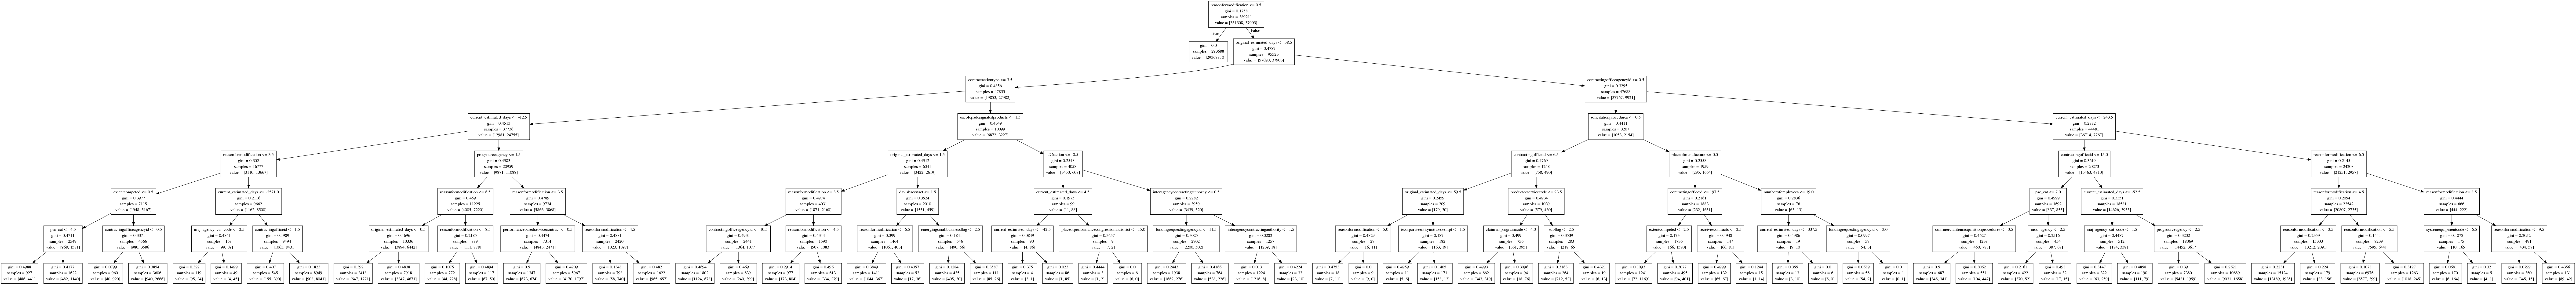

In [38]:
from IPython.display import Image
from IPython.display import display
display(Image('tree_govSpending.png')) 

## Feature importance  - DecisionTree classifier using the best estimator

In [39]:
bestEstimator = grid.best_estimator_
bestEstimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [41]:
y_pred = bestEstimator.predict(X_test)

In [42]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred)

array([[146377,   4373],
       [  5199,  10856]])

In [43]:
importances = bestEstimator.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the top features
print("Top Features:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Top Features:
1. feature 7 (0.621918)
2. feature 154 (0.190747)
3. feature 155 (0.049112)
4. feature 6 (0.048880)
5. feature 2 (0.040050)
6. feature 20 (0.017075)
7. feature 33 (0.010589)
8. feature 48 (0.008620)
9. feature 3 (0.008033)
10. feature 47 (0.003004)


In [44]:
important_features = pd.DataFrame({'feature':feature_cols, 'importance':importances})
important_features.sort_values('importance', ascending=False).head(10)

,feature,importance
7,reasonformodification,0.621918
154,original_estimated_days,0.190747
155,current_estimated_days,0.049112
6,contractactiontype,0.048880
2,contractingofficeagencyid,0.040050
20,progsourceagency,0.017075
33,useofepadesignatedproducts,0.010589
48,solicitationprocedures,0.008620
3,contractingofficeid,0.008033
47,a76action,0.003004


In [45]:
importantFeaturesList1 = important_features.sort_values('importance', ascending=False)['feature'].head(8).tolist()


## Random Forest - with tunned parameters

In [46]:
#   Create the prediction Column 1 if it is an Overspending observation ( baseandalloptionsvalue < 0 )

spend_df['overSpending'] = spend_df['baseandalloptionsvalue'].map(lambda x: 1 if x < 0 else 0)


In [47]:
spend_df.overSpending.value_counts()   

0    502058
1     53958
Name: overSpending, dtype: int64

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#feature_cols = ['reasonformodification','current_estimated_days','original_estimated_days','contractingofficeid',
     #           'productorservicecode','placeofperformancecongressionaldistrict','psc_cat','annualrevenue',
        #        'numberofoffersreceived','congressionaldistrict','vendor_cd','numberofemployees']

In [49]:
feature_cols = ['contractingofficeid','original_estimated_days',
                'productorservicecode','placeofperformancecongressionaldistrict','psc_cat','annualrevenue',
                'numberofoffersreceived','congressionaldistrict','vendor_cd','numberofemployees']

In [50]:
# define X and y

X = spend_df[feature_cols]

y = spend_df.overSpending

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78978)


In [51]:

rfclass = RandomForestClassifier(n_estimators=1000, random_state=1)
rfclass.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [52]:
y_pred_class = rfclass.predict(X_test)

In [53]:
y_pred_prob =  rfclass.predict_proba(X_test)[:, 1]

### Score

In [54]:
print accuracy_score(y_test, y_pred_class)

0.938491052426


In [55]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred_prob)

0.92869335519020679

In [56]:
print confusion_matrix(y_test, y_pred_class)

[[146707   4043]
 [  6217   9838]]


#### Confusion Matrix

     True Positives :   9838
     True Negatives :  146707
     False Positives :  4043
     False Negatives :  6217

In [88]:
spend_df.shape

(556016, 162)

## Create pickle files to expose the model : categorical lists and model

In [57]:
from sklearn.externals import joblib
joblib.dump(rfclass, 'overSpendingClassifier.pkl') 


['overSpendingClassifier.pkl']

In [58]:
from sklearn.externals import joblib

joblib.dump(list_pl_perf_district, 'list_pl_perf_district.pkl') 
joblib.dump(list_productorservicecode, 'list_productorservicecode.pkl') 
joblib.dump(list_psc_cat, 'list_psc_cat.pkl') 
joblib.dump(list_contractingofficeid, 'list_contractingofficeid.pkl') 
joblib.dump(list_reasonformodification, 'list_reasonformodification.pkl') 
joblib.dump(list_congressionaldistrict, 'list_congressionaldistrict.pkl') 
joblib.dump(list_vendor_cd, 'list_vendor_cd.pkl') 


['list_vendor_cd.pkl']

###   Simulate consuming the model - Test

In [61]:
def calculate_days(signeddate, calcDate):
    from datetime import date
    signeddate = datetime.datetime.strptime(signeddate, '%m/%d/%Y').date()
    calcDate = datetime.datetime.strptime(calcDate, '%m/%d/%Y').date()
    estimated = ((calcDate - signeddate))
    return estimated.days

In [62]:
def convert_categorical(cat_col, cat_list):
    if (cat_col != ''):
        if (cat_col in cat_list):
            result = cat_list.index(cat_col)
        else:
            result = 'NONE'
    else:
        result = 'NONE'
    return result

In [63]:
def split_convert_categorical(cat_col, cat_list):
    if (cat_col != ''):
        cat_col = cat_col.split(':')[0]
        if (cat_col in cat_list):
            result = cat_list.index(cat_col)
        else:
            result = 'NONE'
    else:
        result = 'NONE'
    return result

In [64]:
contractingofficeid = split_convert_categorical("283213: SSA OFC OF ACQUISITION  GRANTS", list_contractingofficeid)

In [65]:
productorservicecode = split_convert_categorical("7030: INFORMATION TECHNOLOGY SOFTWARE", list_productorservicecode)

In [66]:
placeofperfocongdistrict = convert_categorical("TX21", list_pl_perf_district)

In [67]:
psc_cat = convert_categorical("70", list_psc_cat)

In [68]:
congressionaldistrict = convert_categorical(25, list_congressionaldistrict)

In [69]:
vendor_cd = convert_categorical(12, list_vendor_cd)

In [70]:
feature_cols = ['original_estimated_days','contractingofficeid',
                'productorservicecode','placeofperformancecongressionaldistrict','psc_cat','annualrevenue',
                'numberofoffersreceived','congressionaldistrict','vendor_cd','numberofemployees']


currentcompletiondate = "3/31/2017"
ultimatecompletiondate = "3/31/2017"

reasonformodification = split_convert_categorical("G: EXERCISE AN OPTION", list_reasonformodification)

signeddate = "10/1/2016"
current_estimated_days = calculate_days(signeddate, currentcompletiondate)

#print (current_estimated_days)

signeddate = "10/1/2016"
original_estimated_days = calculate_days(signeddate, ultimatecompletiondate)

#print (original_estimated_days)

contractingofficeid = split_convert_categorical("283213: SSA OFC OF ACQUISITION  GRANTS", list_contractingofficeid)

productorservicecode = split_convert_categorical("7030: INFORMATION TECHNOLOGY SOFTWARE", list_productorservicecode)

placeofperfocongdistrict = convert_categorical("TX21", list_pl_perf_district)
#string
psc_cat = convert_categorical("70", list_psc_cat)
annualrevenue = 0
numberofoffersreceived = 1
#numeric
congressionaldistrict = convert_categorical(25,list_congressionaldistrict)
#numeric
vendor_cd =  convert_categorical(12, list_vendor_cd)
numberofemployees = 0

##  Logistic Regression -    for comparison

In [73]:
from sklearn import metrics

# AFTER PARAMETER TUNNING:
feature_cols = ['original_estimated_days','contractingofficeid',
                'productorservicecode','placeofperformancecongressionaldistrict','psc_cat','annualrevenue',
                'numberofoffersreceived','congressionaldistrict','vendor_cd','numberofemployees']

X = spend_df[feature_cols]

y = spend_df.overSpending

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=78978)

In [85]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# class predictions 
y_pred_class = logreg.predict(X_test)

# calculate classification accuracy
print metrics.accuracy_score(y_test, y_pred_class)

0.901401484666


In [86]:
# confusion matrix

metrics.confusion_matrix(y_test, y_pred_class)

array([[200109,    699],
       [ 21230,    369]])